## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Pidato Ketua Dewan Gubernur Federal Reserve Jerome Powell 
#### 1. Analisis Sentimen ini dibuat untuk memahami dan mengukur sentimen (positif, negatif, atau netral) dari pernyataan yang dibuat oleh Ketua Federal Reserve, Jerome Powell, yang umumnya berdampak signifikan pada pasar keuangan global. Data yang digunakan adalah transkrip pidato, pernyataan, atau konferensi pers Jerome Powell. Idealnya, data ini dapat diperoleh dari kaggle.


##### 3. Import Library

In [109]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi (opsional, tapi disarankan)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Natural Language Processing (NLP) dan Sentimen
# NLTK adalah salah satu library dasar
import nltk
nltk.download('wordnet')
#untuk labeling
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

# nltk.download(['punkt', 'stopwords', 'vader_lexicon']) # Jalankan ini jika Anda belum memiliki paket-paket ini
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Algoritma sentimen populer
# Atau library yang lebih canggih seperti transformer dari Hugging Face
# from transformers import pipeline


[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4. Load Data

In [110]:
# Tentukan path file TXT Anda
file_path_txt = 'pidato_powel.txt'

# Load teks dari file
try:
    with open(file_path_txt, 'r', encoding='utf-8') as file:
        full_text = file.read()
    
    print("Teks berhasil dimuat!")

    # Langkah selanjutnya: Ubah teks menjadi DataFrame
    # 
    # Karena sentimen biasanya dianalisis per kalimat atau per paragraf, 
    # kita akan memecah teks menjadi kalimat-kalimat (sentence tokenization).
    
    # Memastikan library NLTK sudah diimpor dan paket 'punkt' sudah didownload
    import nltk
    # nltk.download('punkt') # uncomment/jalankan jika belum pernah didownload
    
    from nltk.tokenize import sent_tokenize
    
    # Tokenisasi teks menjadi daftar kalimat
    sentences = sent_tokenize(full_text)
    
    # Buat DataFrame dari daftar kalimat tersebut
    df = pd.DataFrame(sentences, columns=['Statement'])
    
except FileNotFoundError:
    print(f"Error: File TXT tidak ditemukan di {file_path_txt}. Pastikan path benar.")
    
except Exception as e:
    print(f"Terjadi kesalahan saat membaca file: {e}")

# Tampilkan 5 baris pertama (yang sekarang adalah kalimat-kalimat)
print("\n5 Kalimat Awal (diubah menjadi DataFrame):")
if 'df' in locals():
    print(df.head())
    
    # Tampilkan jumlah total kalimat/baris
    print(f"\nTotal Kalimat/Baris untuk Analisis: {len(df)}")

Teks berhasil dimuat!

5 Kalimat Awal (diubah menjadi DataFrame):
                                           Statement
0                         <NAME>CHAIR POWELL</NAME>.
1                                    Good afternoon.
2  At the Federal Reserve, we are strongly commit...
3  Since the beginning of the pandemic, we have t...
4  Today my colleagues on the Federal Open Market...

Total Kalimat/Baris untuk Analisis: 652


## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [112]:
print(f"Jumlah baris dalam data: {len(df)}")

Jumlah baris dalam data: 652


#### 2. Panjang Rata - Rata Setiap Baris

In [113]:
# Hitung jumlah kata di setiap baris (kalimat)
df['Word_Count'] = df['Statement'].apply(lambda x: len(str(x).split()))

# Hitung panjang rata-rata
average_word_count = df['Word_Count'].mean()

print(f"Panjang rata-rata (jumlah kata) per baris: {average_word_count:.2f} kata")

# Tampilkan beberapa statistik deskriptif
print("\nStatistik Jumlah Kata:")
print(df['Word_Count'].describe())

Panjang rata-rata (jumlah kata) per baris: 15.90 kata

Statistik Jumlah Kata:
count    652.000000
mean      15.895706
std       15.139845
min        1.000000
25%        5.000000
50%       13.000000
75%       23.000000
max      204.000000
Name: Word_Count, dtype: float64


#### 3. Cek Data Duplikasi

In [114]:
# Cek jumlah duplikasi
duplicated_rows = df.duplicated(subset=['Statement']).sum()

print(f"Jumlah data duplikasi berdasarkan kolom 'Statement': {duplicated_rows}")

if duplicated_rows > 0:
    print("\nContoh data duplikasi:")
    # Tampilkan beberapa contoh yang duplikat
    duplicate_statements = df[df.duplicated(subset=['Statement'], keep=False)].sort_values(by='Statement')
    print(duplicate_statements.head(4))
    
    # Menghapus duplikasi (disarankan sebelum analisis)
    # df.drop_duplicates(subset=['Statement'], inplace=True)
    # print(f"\nJumlah baris setelah menghapus duplikasi: {len(df)}")

Jumlah data duplikasi berdasarkan kolom 'Statement': 82

Contoh data duplikasi:
                      Statement  Word_Count
0    <NAME>CHAIR POWELL</NAME>.           2
174  <NAME>CHAIR POWELL</NAME>.           2
200  <NAME>CHAIR POWELL</NAME>.           2
217  <NAME>CHAIR POWELL</NAME>.           2


#### 4. Cek Data Kosong

In [115]:
# Cek missing values per kolom
missing_values = df.isnull().sum()

print("\nJumlah data kosong (missing values) per kolom:")
print(missing_values)

if missing_values['Statement'] > 0:
    print(f"\nPERHATIAN: Ditemukan {missing_values['Statement']} baris kosong pada kolom 'Statement'. Perlu dihapus/ditangani.")
    # Menghapus baris dengan nilai kosong
    # df.dropna(subset=['Statement'], inplace=True)


Jumlah data kosong (missing values) per kolom:
Statement     0
Word_Count    0
dtype: int64


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

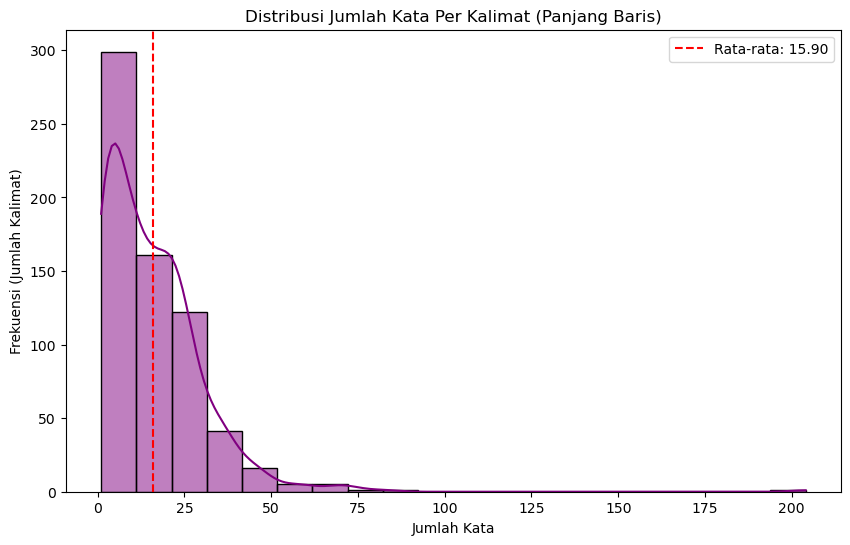

In [117]:


# Asumsi: Kolom 'Word_Count' sudah ada (dibuat di langkah Data Understanding #2)
# Jika belum, pastikan Anda menjalankannya:
# df['Word_Count'] = df['Statement'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
# Menggunakan distplot atau histplot untuk melihat distribusi frekuensi
sns.histplot(df['Word_Count'], bins=20, kde=True, color='purple')
plt.title('Distribusi Jumlah Kata Per Kalimat (Panjang Baris)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi (Jumlah Kalimat)')
plt.axvline(df['Word_Count'].mean(), color='red', linestyle='--', label=f"Rata-rata: {df['Word_Count'].mean():.2f}")
plt.legend()
plt.show()

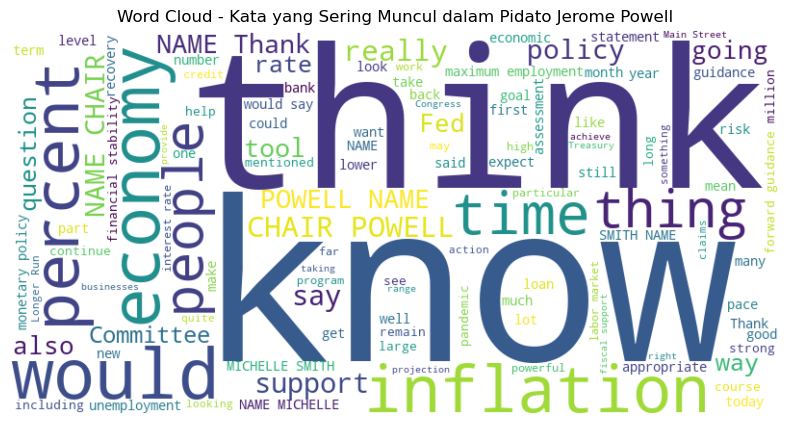

In [116]:
from wordcloud import WordCloud

# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['Statement'].astype(str))

# --- Pre-processing Awal untuk Word Cloud ---
# Hapus Stopwords (kata umum seperti 'dan', 'yang', 'The', 'a', dll.)
from nltk.corpus import stopwords
# Tambahkan beberapa kata yang mungkin sering muncul di pidato Fed
stop_words = set(stopwords.words('english'))
stop_words.update(['the', 'to', 'of', 'and', 'in', 'is', 'we', 'that', 'it', 'will', 'a', 'our', 'for', 'have', 'as', 'are', 'be', 'i', 'this', 'us']) # Tambahan kata umum

# Generate Word Cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stop_words, 
    min_font_size=10
).generate(all_text)

# Tampilkan visualisasi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata yang Sering Muncul dalam Pidato Jerome Powell")
plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [55]:
from nltk.tokenize import word_tokenize

# Tokenisasi setiap kalimat di kolom 'Statement'
df['Tokens'] = df['Statement'].apply(lambda x: word_tokenize(x.lower()))

print("Contoh hasil Tokenisasi:")
print(df['Tokens'].head(1))

Contoh hasil Tokenisasi:
0    [<, name, >, chair, powell, <, /name, >, .]
Name: Tokens, dtype: object


#### 2. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [56]:
from nltk.corpus import stopwords
import string

# 1. Definisikan Stopwords dan Punctuation
stop_words = set(stopwords.words('english'))
# Tambahkan Punctuation (tanda baca)
punctuation = string.punctuation

# 2. Definisikan Fungsi Pembersihan
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Hapus angka
        if token.isdigit():
            continue
        # Hapus Punctuation
        if token in punctuation:
            continue
        # Hapus Stopwords
        if token in stop_words:
            continue
        # Hapus token yang hanya berisi satu karakter (misalnya sisa dari 's)
        if len(token) <= 1:
            continue
        
        cleaned_tokens.append(token)
    return cleaned_tokens

# 3. Terapkan Fungsi
df['Cleaned_Tokens'] = df['Tokens'].apply(clean_tokens)

print("\nContoh hasil Stopword Removal & Pembersihan:")
print(df['Cleaned_Tokens'].head(1))


Contoh hasil Stopword Removal & Pembersihan:
0    [name, chair, powell, /name]
Name: Cleaned_Tokens, dtype: object


#### 3. Lemmatization dan Stemming

In [57]:
from nltk.stem import WordNetLemmatizer
# Pastikan Anda telah mengunduh 'wordnet' jika belum
# nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()

# Definisikan Fungsi Lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Terapkan Fungsi
df['Lemmatized_Tokens'] = df['Cleaned_Tokens'].apply(lemmatize_tokens)

# Gabungkan token yang telah dilemmatisasi menjadi teks kembali (diperlukan untuk Vektorisasi)
df['Cleaned_Text'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

print("\nContoh hasil Lemmatization (Tokens):")
print(df['Lemmatized_Tokens'].head(1))
print("\nContoh hasil Lemmatization (Text untuk Vektorisasi):")
print(df['Cleaned_Text'].head(1))


Contoh hasil Lemmatization (Tokens):
0    [name, chair, powell, /name]
Name: Lemmatized_Tokens, dtype: object

Contoh hasil Lemmatization (Text untuk Vektorisasi):
0    name chair powell /name
Name: Cleaned_Text, dtype: object


#### 4. Text Normalisasi
Text Normalisasi sudah tercakup dalam langkah-langkah sebelumnya, sperti 
 1. Case Folding: Mengubah semua teks menjadi huruf kecil (.lower()) pada langkah tokenisasi.
 2. Pembersihan: Menghapus angka, tanda baca, dan stopwords.
 3. Lematization: Menyeragamkan bentuk kata.

#### 5. Labeling Data 

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') # Pastikan sudah diunduh

sid = SentimentIntensityAnalyzer()

# Definisikan Fungsi untuk Mendapatkan Sentimen VADER
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    # Gunakan skor 'compound' (komposit) untuk menentukan sentimen
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan Labeling pada teks bersih
df['Sentiment'] = df['Cleaned_Text'].apply(get_vader_sentiment)
df['Polarity_Score'] = df['Statement'].apply(lambda x: sid.polarity_scores(x)['compound']) # Menggunakan teks asli untuk skor yang lebih baik

print("\nContoh hasil Labeling Sentimen:")
print(df[['Statement', 'Sentiment', 'Polarity_Score']].head())


Contoh hasil Labeling Sentimen:
                                           Statement Sentiment  Polarity_Score
0                         <NAME>CHAIR POWELL</NAME>.   Neutral          0.0000
1                                    Good afternoon.  Positive          0.4404
2  At the Federal Reserve, we are strongly commit...  Positive          0.4939
3  Since the beginning of the pandemic, we have t...  Positive          0.7003
4  Today my colleagues on the Federal Open Market...  Positive          0.5859


#### 6. Text Vektorisasi

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
# Teks bersih digunakan sebagai fitur
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur (kata)

# Fit dan Transform data teks
X = tfidf_vectorizer.fit_transform(df['Cleaned_Text']).toarray()
y = df['Sentiment'] # Label sentimen yang sudah dibuat

print("\nBentuk Matriks Fitur (X) setelah Vektorisasi:")
print(X.shape)


Bentuk Matriks Fitur (X) setelah Vektorisasi:
(652, 1338)


#### 7. Data Splitting

In [60]:
from sklearn.model_selection import train_test_split

# Split data dengan skala 80% (train) dan 20% (test)
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Matriks fitur (hasil TF-IDF)
    y,              # Label (sentimen)
    test_size=0.20, # Skala 20% untuk data uji
    random_state=42, # Untuk memastikan hasil yang sama setiap kali dijalankan
    stratify=y       # Penting untuk klasifikasi: memastikan distribusi label di train/test set sama
)

print(f"\nUkuran Data Training (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Ukuran Data Testing (X_test, y_test): {X_test.shape}, {y_test.shape}")


Ukuran Data Training (X_train, y_train): (521, 1338), (521,)
Ukuran Data Testing (X_test, y_test): (131, 1338), (131,)


#### 8. Matrix Correlation 

In [61]:
# Korelasi antara Polarity Score dan Word Count
correlation = df['Polarity_Score'].corr(df['Word_Count'])
print(f"\nKorelasi antara Polarity Score dan Jumlah Kata: {correlation:.2f}")


Korelasi antara Polarity Score dan Jumlah Kata: 0.16


#### 9. SVM

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Asumsi: X_train, X_test, y_train, y_test sudah terdefinisi dari Data Splitting.

# Inisialisasi model Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

# Membuat prediksi pada data testing <-- BARIS KRUSIAL INI HARUS DIJALANKAN
y_pred_svm = svm_model.predict(X_test)

print("Prediksi model SVM berhasil dibuat!")

Prediksi model SVM berhasil dibuat!


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confussion Matrix

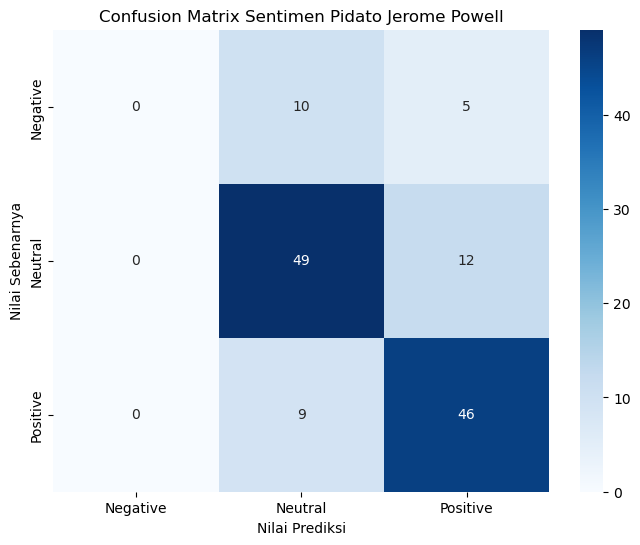

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Dapatkan label unik (Sentimen: Negative, Neutral, Positive)
labels = sorted(y_test.unique())

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels, 
    yticklabels=labels
)
plt.title('Confusion Matrix Sentimen Pidato Jerome Powell')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.show()

#### 2. Laporan Klasifikasi

In [65]:
from sklearn.metrics import classification_report

# Cetak Classification Report
print("--- Classification Report (SVM Model) ---")
print(classification_report(y_test, y_pred_svm))

--- Classification Report (SVM Model) ---
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.72      0.80      0.76        61
    Positive       0.73      0.84      0.78        55

    accuracy                           0.73       131
   macro avg       0.48      0.55      0.51       131
weighted avg       0.64      0.73      0.68       131



c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 

In [80]:
# Data teks baru yang akan diprediksi
new_statements = [
    "We remain highly attentive to inflation risks and are prepared to adjust policy as appropriate.",
    "The labor market is strong, suggesting durable economic resilience.",
    "There are indications that the pace of rate hikes should slow down.",
    "The outlook for global growth has deteriorated significantly.",
    "We see persistent evidence of downside risks to employment."

]


# Buat DataFrame baru
df_new = pd.DataFrame({'Statement': new_statements})

print("Data Baru yang akan diprediksi:")
print(df_new)

Data Baru yang akan diprediksi:
                                           Statement
0  We remain highly attentive to inflation risks ...
1  The labor market is strong, suggesting durable...
2  There are indications that the pace of rate hi...
3  The outlook for global growth has deteriorated...
4  We see persistent evidence of downside risks t...


In [95]:

# Tentukan path file TXT baru Anda
file_path_new_txt = 'New_statment.txt' 

# Load teks dari file dan pisahkan menjadi kalimat
try:
    with open(file_path_new_txt, 'r', encoding='utf-8') as file:
        full_text_new = file.read()
    
    # Tokenisasi teks menjadi daftar kalimat
    sentences_new = sent_tokenize(full_text_new)
    
    # Buat DataFrame baru
    df_new = pd.DataFrame(sentences_new, columns=['Statement'])
    
    print(f"Data baru berhasil dimuat. Total {len(df_new)} kalimat.")
except FileNotFoundError:
    print(f"Error: File TXT tidak ditemukan di {file_path_new_txt}. Pastikan path benar.")
    df_new = pd.DataFrame({'Statement': []}) # Buat DataFrame kosong agar kode tidak error

Data baru berhasil dimuat. Total 597 kalimat.


#### 2. Pemrosesan Teks Data Baru
Data baru harus melalui semua langkah pra-pemrosesan yang sama persis seperti data pelatihan (Tokenisasi, Stopword Removal, Lemmatization).

In [97]:
# Inisialisasi tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Fungsi pembersihan yang sama dari langkah sebelumnya
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token.isdigit() or token in punctuation or token in stop_words or len(token) <= 1:
            continue
        cleaned_tokens.append(token)
    return cleaned_tokens

# Terapkan semua langkah pre-processing pada df_new

# 1. Tokenisasi & Case Folding
df_new['Tokens'] = df_new['Statement'].apply(lambda x: word_tokenize(x.lower()))

# 2. Stopword Removal & Pembersihan
df_new['Cleaned_Tokens'] = df_new['Tokens'].apply(clean_tokens)

# 3. Lemmatization
df_new['Lemmatized_Tokens'] = df_new['Cleaned_Tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# 4. Gabungkan kembali menjadi teks bersih
df_new['data_bersih'] = df_new['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

print("\nData Baru Setelah Pembersihan:")
print(df_new['data_bersih'])


Data Baru Setelah Pembersihan:
0                                name chair powell /name
1                                         good afternoon
2      colleague remain squarely focused achieving du...
3      economy strong overall made significant progre...
4      labor market cooled formerly overheated state ...
                             ...                        
592                  rule thing completely this—in world
593                                appear likely outcome
594                                    think 4.3 percent
595    meaningfully restrictive think well-calibrated...
596                                        so—thank much
Name: data_bersih, Length: 597, dtype: object


#### 3. Vektorisasi Data Baru

In [98]:
# Vektorisasi data baru menggunakan vectorizer yang sudah ada
X_new = tfidf_vectorizer.transform(df_new['data_bersih']).toarray()

print(f"\nBentuk Matriks Fitur Data Baru: {X_new.shape}")


Bentuk Matriks Fitur Data Baru: (597, 1338)


#### 4. Prediksi Menggunakan Model SVM

In [99]:
# Membuat prediksi sentimen
predictions = svm_model.predict(X_new)

# Tambahkan hasil prediksi ke DataFrame baru
df_new['Predicted_Sentiment'] = predictions

# Tampilkan hasil akhir
print("\n--- Hasil Prediksi Sentimen ---")
print(df_new[['Statement', 'Predicted_Sentiment']])


--- Hasil Prediksi Sentimen ---
                                             Statement Predicted_Sentiment
0                           <NAME>CHAIR POWELL</NAME>.             Neutral
1                                      Good afternoon.            Positive
2    My colleagues and I remain squarely focused on...            Positive
3    The economy is strong overall and has made sig...            Positive
4    The labor market has cooled from its formerly ...             Neutral
..                                                 ...                 ...
592  You don’t rule things completely in or out in ...            Positive
593        That doesn’t appear to be a likely outcome.            Positive
594                      I think we’re at 4.3 percent.             Neutral
595  That’s, that’s meaningfully restrictive, and I...            Positive
596                            So—Thank you very much.            Positive

[597 rows x 2 columns]


# Virtualisasi

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_9236\902934620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


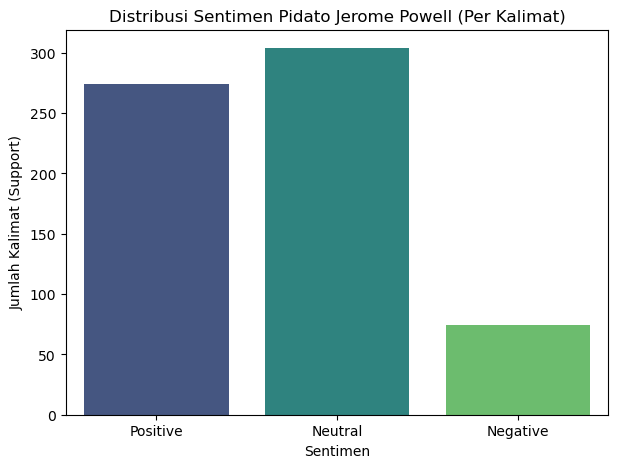

In [106]:

# Asumsi: Kolom 'Sentiment' (hasil VADER) sudah ada di df
plt.figure(figsize=(7, 5))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Distribusi Sentimen Pidato Jerome Powell (Per Kalimat)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Kalimat (Support)')
plt.show()

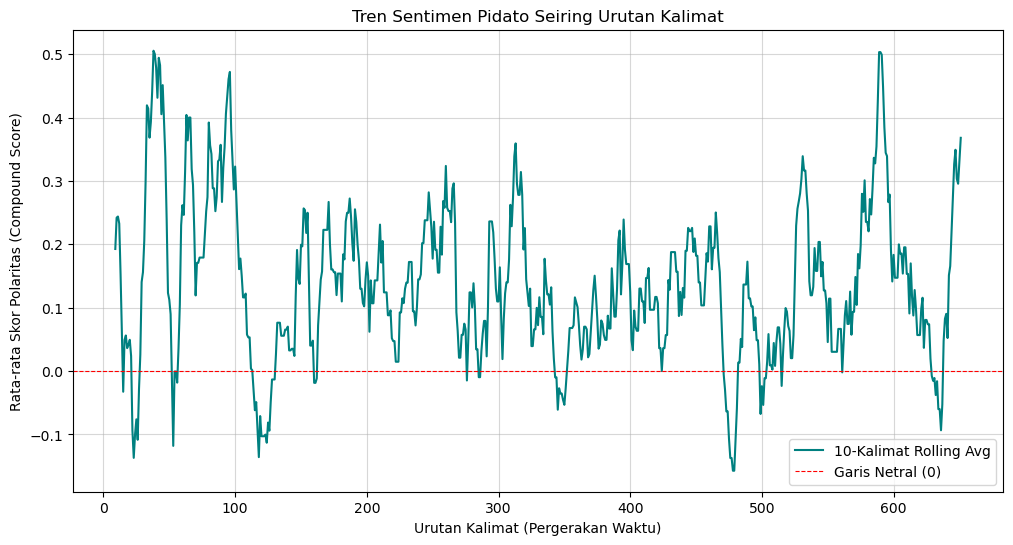

In [101]:
# Pastikan kolom 'Date' adalah datetime dan 'Polarity_Score' sudah ada

# 1. Pastikan data di kelompokkan (jika Anda memiliki data dari banyak tanggal)
# df['Date'] = pd.to_datetime(df['Date'])
# sentiment_over_time = df.groupby(df['Date'].dt.date)['Polarity_Score'].mean().reset_index()

# Untuk contoh ini, kita asumsikan setiap baris adalah urutan waktu
# dan kita gunakan rata-rata rolling window untuk kelancaran visualisasi
window_size = 10
df['Rolling_Polarity'] = df['Polarity_Score'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Polarity'], label=f'{window_size}-Kalimat Rolling Avg', color='teal')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Garis Netral (0)')
plt.title('Tren Sentimen Pidato Seiring Urutan Kalimat')
plt.xlabel(f'Urutan Kalimat (Pergerakan Waktu)')
plt.ylabel('Rata-rata Skor Polaritas (Compound Score)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

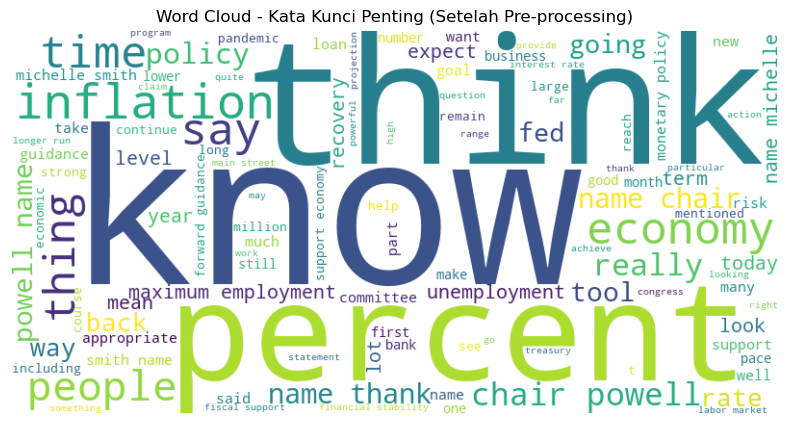

In [ ]:
from wordcloud import WordCloud

# Asumsi: Kolom 'Cleaned_Text' (teks bersih setelah pre-processing) sudah ada
all_clean_text = ' '.join(df['Cleaned_Text'].astype(str))

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    min_font_size=10
).generate(all_clean_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata Kunci Penting (Setelah Pre-processing)")
plt.show()